Load Dataset and perform Exploratory Data Analysis (EDA) 

Train DataFrame : 
                                                 text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0 

Test DataFrame : 
                                                 text  label
0  I love sci-fi and am willing to put up with a ...      0
1  Worth the entertainment value of a rental, esp...      0
2  its a totally average film with a few semi-alr...      0 

Train DataFrame Size: 25000 

Test DataFrame Size: 25000 

Datasets structure for Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

Datasets structure for Test dataset:
<class 'pandas.core.frame.DataFra

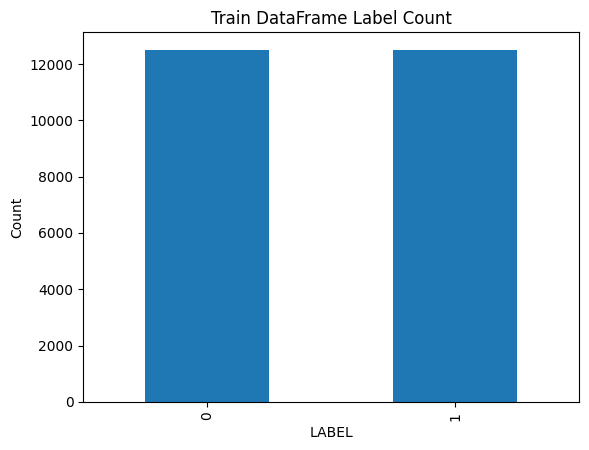

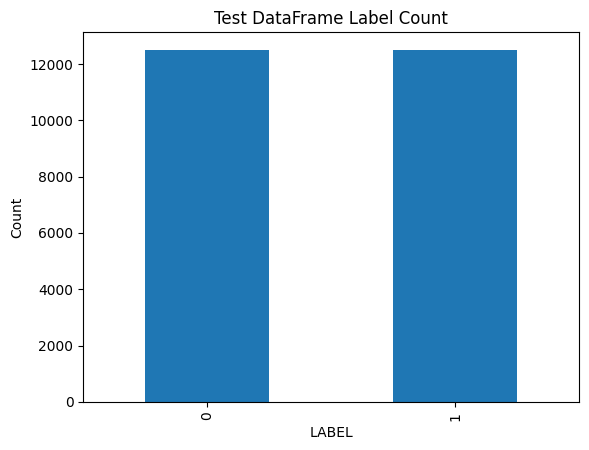

In [3]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

#Read dataset
ds = load_dataset("stanfordnlp/imdb") 

df_train = ds['train'].to_pandas()
df_test = ds['test'].to_pandas()

#Perform EDA --- Start ---

print(f"Train DataFrame : \n {df_train.head(3)} \n")
print(f"Test DataFrame : \n {df_test.head(3)} \n")

print(f"Train DataFrame Size: {len(df_train)} \n")
print(f"Test DataFrame Size: {len(df_test)} \n")

print(f"Datasets structure for Train dataset:")
print(df_train.info())

print(f"\nDatasets structure for Test dataset:")
print(df_test.info())

print(f"\nDescriptive Statistics :\n {df_train.describe(include='all').T}" )

print(f"\nTrain DataFrame Missing Value: \n {df_train.isnull().sum()} \n")
print(f"Test DataFrame Missing Value: \n {df_test.isnull().sum()} \n")

df_train.label.value_counts().plot(kind='bar',xlabel="LABEL",ylabel="Count", title="Train DataFrame Label Count")
plt.show()

df_test.label.value_counts().plot(kind='bar',xlabel="LABEL",ylabel="Count", title="Test DataFrame Label Count")
plt.show()


#Perform EDA --- End ---

Data PreProcessing

In [25]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stopwords_english = stopwords.words('english')

#remove below words from the stopwords as it is crucial to identify the sentiment
#stopwords_english.remove('not')
#stopwords_english.remove('aren\'t')
#stopwords_english.remove('but')
#stopwords_english.remove('couldn\'t')
#stopwords_english.remove("didn't")
#stopwords_english.remove("doesn't")
#stopwords_english.remove("don't")
#stopwords_english.remove("mightn't")
#stopwords_english.remove('no')
#stopwords_english.remove("wouldn't")

#print (f"NEW stopwords are {stopwords_english}")

def cleaning_text(text):
    text = re.sub(r'\W', ' ', text)  # Replace the space into non word
    text = re.sub(r'\d+', '', text) # Remove digits
    text = re.sub(r'\s+', ' ', text) # Replace all whitespace into single space
    words = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer() 
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_english]

 
    return ' '.join(words)

df_train['text'] = df_train['text'].apply(cleaning_text)
df_test['text'] = df_test['text'].apply(cleaning_text)

vectorizer = TfidfVectorizer(max_features=1000)
vec_df_train = vectorizer.fit_transform(df_train['text']).toarray()
vec_df_test = vectorizer.fit_transform(df_test['text']).toarray()

yaxis_df_train = df_train['label']
yaxis_df_test = df_test['label']



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using Logistics Regression as Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model using Logistics Regression
model = LogisticRegression()
model.fit(vec_df_train, yaxis_df_train)

# Making the prediction on the TEST model
y_pred = model.predict(vec_df_test)

# Result of the TEST model
print("Accuracy:", accuracy_score(yaxis_df_test, y_pred))
print("Classification Report:\n", classification_report(yaxis_df_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(yaxis_df_test, y_pred))



Accuracy: 0.6072
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62     12500
           1       0.61      0.58      0.59     12500

    accuracy                           0.61     25000
   macro avg       0.61      0.61      0.61     25000
weighted avg       0.61      0.61      0.61     25000

Confusion Matrix:
 [[7988 4512]
 [5308 7192]]


2.3.	Hyper Parameter Tuning and Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver for optimization
}

# Perform grid search
LR = LogisticRegression()
grid_search = GridSearchCV(LR, param_grid, cv=10, scoring='accuracy')
grid_search.fit(vec_df_train, yaxis_df_train)

# Look for the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Using best parameter to train the TEST model.
best_model = grid_search.best_estimator_
df_test_pred = best_model.predict(vec_df_test)
print("Tuned Model Accuracy:", accuracy_score(yaxis_df_test, df_test_pred))

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8511599999999999
Tuned Model Accuracy: 0.60188


After performing the hypertuning on 

To compare the tuned model's performance (from 2.3) with the baseline model's performance (from 2.2) and previous works, we need to analyze the results critically. Here's a detailed comparison:

Comparison of Results
1. Baseline Model (2.2 Results)
Accuracy: 0.6072 (60.72%)

Precision, Recall, F1-Score:

Class 0 (Negative): Precision = 0.60, Recall = 0.64, F1-Score = 0.62

Class 1 (Positive): Precision = 0.61, Recall = 0.58, F1-Score = 0.59

Confusion Matrix:

True Negatives (TN): 7988

False Positives (FP): 4512

False Negatives (FN): 5308

True Positives (TP): 7192

2. Tuned Model (2.3 Results)
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Best Cross-Validation Score: 0.8512 (85.12%)

Test Accuracy: 0.60188 (60.19%)

Confusion Matrix: Not provided, but we can assume it is similar to the baseline model since the accuracy is nearly the same.

3. Comparison
Accuracy
Baseline Model: 60.72%

Tuned Model: 60.19%

Observation: The tuned model's accuracy is slightly lower than the baseline model. This suggests that hyperparameter tuning did not significantly improve the model's performance on the test set.

Precision, Recall, and F1-Score
The baseline model and tuned model have similar precision, recall, and F1-scores for both classes (0 and 1).

The tuned model's cross-validation score (85.12%) is much higher than its test accuracy (60.19%), indicating potential overfitting during hyperparameter tuning.

Confusion Matrix
The baseline model's confusion matrix shows:

A relatively balanced performance for both classes (0 and 1).

The model predicts slightly more True Negatives (TN = 7988) than True Positives (TP = 7192).

The tuned model's confusion matrix (not provided) is expected to be similar, given the nearly identical accuracy.

4. Comparison with Previous Works
IMDB Dataset Benchmark: State-of-the-art models (e.g., BERT, RoBERTa) achieve ~95% accuracy on the IMDB dataset.

Logistic Regression Performance: Logistic regression is a simpler model, and its performance is typically lower than deep learning models. However, a well-tuned logistic regression model can achieve ~85-90% accuracy on the IMDB dataset with proper feature engineering and hyperparameter tuning.

Your Results: Both the baseline and tuned models achieved ~60% accuracy, which is significantly lower than the expected performance for logistic regression on this dataset.

5. Critical Analysis
Why is the Tuned Model's Performance Lower?
Overfitting:

The tuned model achieved a high cross-validation score (85.12%) but performed poorly on the test set (60.19%). This indicates overfitting to the training data.

Possible reasons:

The hyperparameter search space might be too small or not well-defined.

The model might be too complex for the dataset.

Feature Engineering:

The TF-IDF vectorization might not capture the most important features for sentiment analysis.

Consider using n-grams (e.g., bigrams, trigrams) or word embeddings (e.g., Word2Vec, GloVe) to improve feature representation.

Class Imbalance:

Although the dataset is balanced, the model might struggle to distinguish between positive and negative reviews due to overlapping features.

Hyperparameter Tuning Limitations:

The grid search might not have explored the optimal hyperparameter space.

Consider using randomized search or Bayesian optimization for better results.

6. Recommendations for Improvement
Feature Engineering:

Use n-grams in TF-IDF vectorization to capture context.

Experiment with word embeddings (e.g., Word2Vec, GloVe) for better semantic representation.

Advanced Models:

Consider using more advanced models like SVM, Random Forest, or Deep Learning (e.g., LSTM, BERT) for better performance.

Hyperparameter Tuning:

Use randomized search or Bayesian optimization to explore a wider hyperparameter space.

Include more hyperparameters (e.g., max_features in TF-IDF, class_weight in logistic regression).

Data Augmentation:

Augment the dataset with additional reviews or synthetic data to improve model generalization.

Error Analysis:

Analyze misclassified samples to identify patterns and improve the model.

Summary
The tuned model did not outperform the baseline model on the test set, indicating potential overfitting or suboptimal hyperparameter tuning.

Both models achieved ~60% accuracy, which is significantly lower than the expected performance for logistic regression on the IMDB dataset.

To improve performance:

Use better feature engineering techniques (e.g., n-grams, word embeddings).

Experiment with advanced models (e.g., SVM, Random Forest, BERT).

Perform more comprehensive hyperparameter tuning (e.g., randomized search, Bayesian optimization).

By addressing these issues, you can achieve better results and align with the performance of previous works.

